In [1]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

app.py
pest.json
pestSVM.ipynb



In [2]:
f = open(r'./pest.json')
dataset = json.load(f)
f.close()

dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

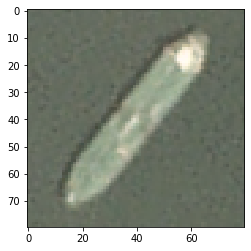

In [14]:
data = np.array(dataset['data']).astype('uint8')
# data[51]
img_length = 80
data = data.reshape(-1,3,img_length,img_length).transpose([0,2,3,1])
plt.imshow(data[51])

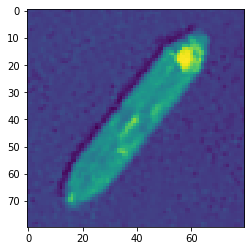

In [4]:
data_gray = [ color.rgb2gray(i) for i in data]
plt.imshow(data_gray[51])

In [5]:
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

/home/ayush/anaconda3/lib/python3.7/site-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


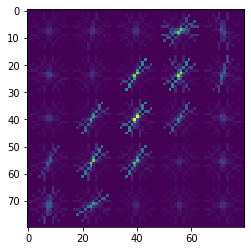

In [6]:
plt.imshow(hog_images[51])

In [7]:
labels =  np.array(dataset['labels']).reshape(len(dataset['labels']),1)


In [8]:
clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)

In [9]:
percentage = 80
partition = int(len(hog_features)*percentage/100)

In [10]:
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

/home/ayush/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
y_pred = clf.predict(x_test)

In [12]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.921875


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       235
         1.0       1.00      0.71      0.83        85

    accuracy                           0.92       320
   macro avg       0.95      0.85      0.89       320
weighted avg       0.93      0.92      0.92       320

